In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('data/train_expanded.csv')

In [3]:
df

,temperature,weekday,weather,rentals
0,24.500000,Tuesday,Clear,363.000000
1,21.300000,Tuesday,Clear,295.000000
2,25.200000,Monday,Cloudy,358.000000
3,29.600000,Monday,Cloudy,430.000000
4,20.800000,Monday,Cloudy,309.000000
...,...,...,...,...
695,27.203601,Thursday,Clear,409.110835
696,19.359533,Sunday,Cloudy,332.865828
697,21.858265,Friday,Clear,333.414684
698,22.484943,Thursday,Cloudy,312.966697


In [4]:
df.isna().sum()

temperature    0
weekday        0
weather        0
rentals        0
dtype: int64

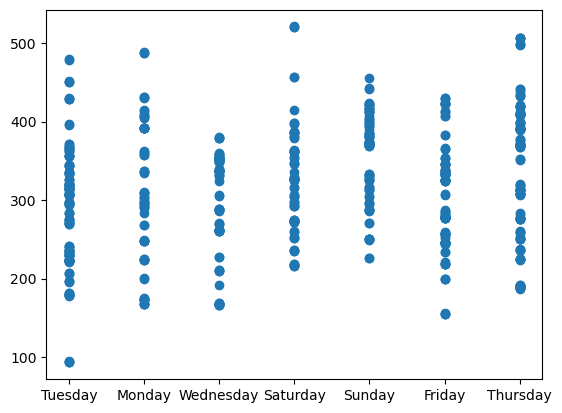

In [5]:
fig,ax = plt.subplots()
ax.scatter(df.weekday,df.rentals)

<BarContainer object of 700 artists>

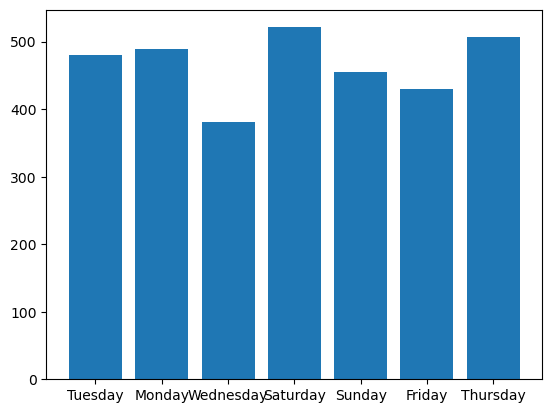

In [6]:
fig,ax = plt.subplots()
ax.bar(df.weekday,df.rentals)

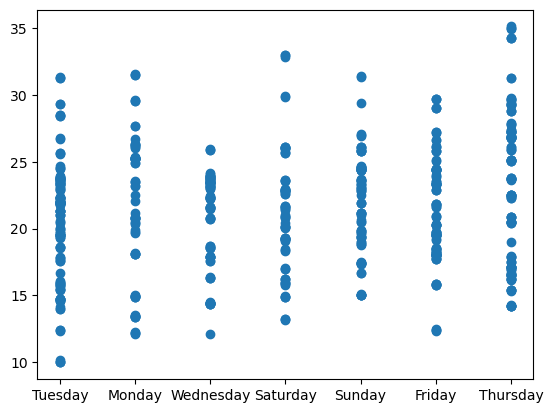

In [7]:
ffig,ax = plt.subplots()
ax.scatter(df.weekday,df.temperature)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
df.dtypes

temperature    float64
weekday         object
weather         object
rentals        float64
dtype: object

In [10]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

weekday
weather


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop('rentals',axis=1)
y = df['rentals']

In [13]:
#Converting data to numerical

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder(sparse_output=False)
categorical_features = ['weekday','weather']

transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x



array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 24.5       ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 21.3       ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.        , 25.2       ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 21.85826488],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , 22.48494337],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 19.16607111]], shape=(700, 11))

In [14]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,24.500000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,21.300000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,25.200000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,29.600000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,20.800000
...,...,...,...,...,...,...,...,...,...,...,...
695,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,27.203601
696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,19.359533
697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.858265
698,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,22.484943


In [15]:
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

In [16]:
model = RandomForestRegressor(random_state=18)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=18)

In [17]:
model.score(x_train,y_train)

0.997887544887529

In [18]:
model.score(x_test,y_test)

0.9881357502173049

In [19]:
y_preds = model.predict(x_test)
y_preds

array([167.35247872, 366.28153051, 349.4313311 , 378.54793923,
       416.20929512, 389.9936242 , 188.25088079, 236.96442475,
       319.04893713, 289.02724683, 381.56906732, 281.27591601,
       219.78002353, 301.01641543, 311.2328253 , 289.67749082,
       363.07258992, 366.11624919, 325.66667048, 397.37540252,
       197.00624308, 375.79993688, 319.31902947, 323.05014383,
       353.89393601, 408.94500477, 289.18900799, 362.8800546 ,
       391.6047722 , 445.43212812, 173.09565932, 276.12940634,
       381.84835499, 235.4879411 , 191.43458157, 301.07318006,
       256.10253122, 297.05043056, 371.24620961, 326.87893865,
       304.16850389, 203.65248386, 240.45740862, 257.06087824,
       391.6047722 , 198.18537529, 203.626757  , 180.27725853,
       168.46383203, 422.43784653, 188.25088079, 336.58529968,
       342.93929798, 328.94622369, 349.29033288, 305.79288754,
       327.3647875 , 391.3697762 , 345.86901074, 308.39279627,
       262.32175102, 281.2964919 , 371.24620961, 233.44

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def rmse(y_test,y_preds):
    return np.sqrt(mean_squared_error(y_test,y_preds))

def evaluation_scores(y_test,y_preds):
    model_scores = {'r2score':r2_score(y_test,y_preds),
                    'mae':mean_absolute_error(y_test,y_preds),
                    'rmse':rmse(y_test,y_preds),
                   'mse':mean_squared_error(y_test,y_preds)}
    return model_scores
    

In [21]:
print(evaluation_scores(y_test,y_preds))

{'r2score': 0.9881357502173049, 'mae': 4.927815927219411, 'rmse': np.float64(8.07475889416536), 'mse': 65.20173119890258}


In [22]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rs_grid = {'n_estimators': np.arange(10,200,10),
           'max_depth':[None,5,10,15],
           'max_features':['sqrt','log2'],
           'min_samples_split':[2,4,6],
           'min_samples_leaf':[1,2,4]}

rs_model = RandomizedSearchCV(model,param_distributions=rs_grid,cv=100,verbose=True,n_iter=10,random_state=18)
rs_model.fit(x_train,y_train)

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [23]:
rs_model.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [24]:
ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_split= 2,min_samples_leaf= 1,max_features= 'log2',max_depth=15,random_state=18)
                                    

In [25]:
ideal_model.fit(transformed_x,y)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=20,
                      random_state=18)

In [40]:
test_data = pd.read_csv('data/test_expanded.csv')
test_x = test_data.drop('id',axis=1)
test_x

,temperature,weekday,weather
0,20.900000,Wednesday,Clear
1,25.100000,Wednesday,Cloudy
2,28.400000,Monday,Clear
3,17.900000,Thursday,Rainy
4,14.500000,Sunday,Cloudy
...,...,...,...
145,16.937545,Friday,Clear
146,21.587332,Thursday,Rainy
147,20.844338,Wednesday,Clear
148,21.437189,Friday,Cloudy


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder(sparse_output=False)
categorical_features = ['weekday','weather']

transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x_test = transformer.fit_transform(test_x)
transformed_x_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 20.9       ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , 25.1       ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        , 28.4       ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 20.8443376 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , 21.43718905],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 16.39150547]], shape=(150, 11))

In [44]:
pd.DataFrame(transformed_x_test)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,20.900000
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,25.100000
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28.400000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,17.900000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14.500000
...,...,...,...,...,...,...,...,...,...,...,...
145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.937545
146,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.587332
147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,20.844338
148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.437189


In [45]:
model_predictions = ideal_model.predict(transformed_x_test)

In [49]:
model_predictions,len(model_predictions)


(array([317.20616892, 357.89813066, 414.77259222, 205.87842404,
        233.62767289, 281.39534898, 210.80286938, 278.88903764,
        368.63885432, 220.87003122, 397.54381677, 335.54391592,
        406.55072457, 205.36978739, 239.31415243, 390.80164229,
        282.13800147, 371.11291299, 307.28139217, 310.95795119,
        271.98954546, 358.2546389 , 262.04458143, 417.06500253,
        311.63136836, 357.90920766, 447.6618091 , 220.46270356,
        431.02445754, 142.5109067 , 209.27442862, 223.88611388,
        236.62593294, 347.25324101, 370.46429622, 284.98937657,
        309.12969852, 365.55126201, 380.82589316, 256.82978803,
        281.72274604, 294.76307198, 402.86566279, 276.32852278,
        293.95263797, 336.3831367 , 274.33540988, 245.61256549,
        370.34402403, 347.34978754, 380.82589316, 431.02445754,
        239.55199517, 401.33805035, 278.88903764, 269.55444407,
        382.23932566, 308.10157617, 262.03878586, 397.54381677,
        399.23438739, 417.06500253, 284.

In [31]:
Real_test_preds = pd.read_csv('data/please_check_discussin_tab.csv')['rentals']
Real_test_preds


0      299
1      378
2      424
3      226
4      175
      ... 
145    247
146    299
147    293
148    315
149    217
Name: rentals, Length: 150, dtype: int64

In [32]:
y_preds
y

0      363.000000
1      295.000000
2      358.000000
3      430.000000
4      309.000000
          ...    
695    409.110835
696    332.865828
697    333.414684
698    312.966697
699    279.936372
Name: rentals, Length: 700, dtype: float64

In [33]:
y_test

237    167.731396
638    371.046459
550    349.105946
573    382.944593
650    416.730279
          ...    
424    521.227138
209    250.780680
75     415.000000
205    422.092922
263    297.083382
Name: rentals, Length: 140, dtype: float64

In [34]:
Real_test_preds

0      299
1      378
2      424
3      226
4      175
      ... 
145    247
146    299
147    293
148    315
149    217
Name: rentals, Length: 150, dtype: int64

In [50]:
evaluation_scores(Real_test_preds,model_predictions)

{'r2score': 0.9385103065980606,
 'mae': 12.428532612941105,
 'rmse': np.float64(17.926193605136874),
 'mse': 321.3484171688501}